In [1]:
import sys
import os

# Adiciona o caminho do diretório pai ao Python
sys.path.append(os.path.abspath('..'))

In [2]:
import pandas as pd

DATA = 'C:\\Users\\steph\\OneDrive\\Documentos\\MeusProjetos\\Ciencia-de-dados\\dados_hash\\farming_equipment.csv'

df = pd.read_csv(DATA)

df.head()

,production
0,52
1,50
2,44
3,50
4,42


In [3]:
df.tail()

,production
31,55
32,50
33,34
34,44
35,42


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   production  36 non-null     int64
dtypes: int64(1)
memory usage: 420.0 bytes


In [5]:
df.describe()

,production
count,36.000000
mean,42.638889
std,7.099911
min,30.000000
25%,37.500000
50%,42.000000
75%,48.500000
max,55.000000


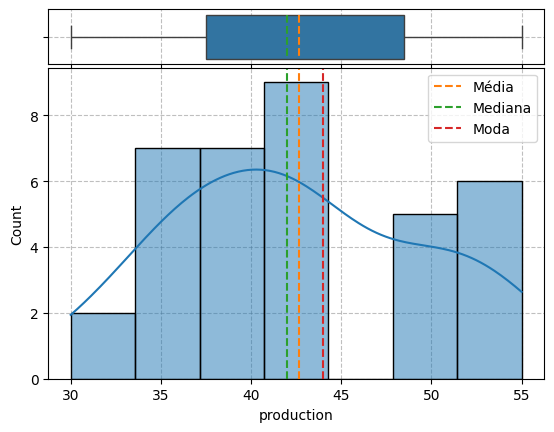

In [6]:
from meus_modulos.auxiliares import hist_box

hist_box(df, 'production')

In [7]:
from scipy.stats import norm, kstest, ks_1samp

ks_1samp(
    df['production'],
    norm.cdf,
    args=(df['production'].mean(), df['production'].std()) 
)

KstestResult(statistic=0.1184298337535814, pvalue=0.6502794267036324, statistic_location=44, statistic_sign=1)

In [8]:
kstest(
    df['production'],
    norm.cdf,
    args=(df['production'].mean(), df['production'].std()) 
)

KstestResult(statistic=0.1184298337535814, pvalue=0.6502794267036324, statistic_location=44, statistic_sign=1)

In [9]:
from scipy.stats import zscore

df['zscore'] = zscore(df['production'], ddof=1)

df.head()

,production,zscore
0,52,1.318483
1,50,1.036789
2,44,0.191708
3,50,1.036789
4,42,-0.089985


In [10]:
kstest(
    df['zscore'],
    norm.cdf
)

KstestResult(statistic=0.1184298337535814, pvalue=0.6502794267036324, statistic_location=0.19170820490280965, statistic_sign=1)

In [11]:
import pandas as pd

DATA = 'C:\\Users\\steph\\OneDrive\\Documentos\\MeusProjetos\\Ciencia-de-dados\\dados_hash\\aircraft.csv'

df = pd.read_csv(DATA)

df.head()

,production
0,28
1,32
2,46
3,24
4,22


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   production  24 non-null     int64
dtypes: int64(1)
memory usage: 324.0 bytes


In [13]:
df.describe()

,production
count,24.000000
mean,27.500000
std,7.627183
min,15.000000
25%,22.750000
50%,28.000000
75%,32.000000
max,46.000000


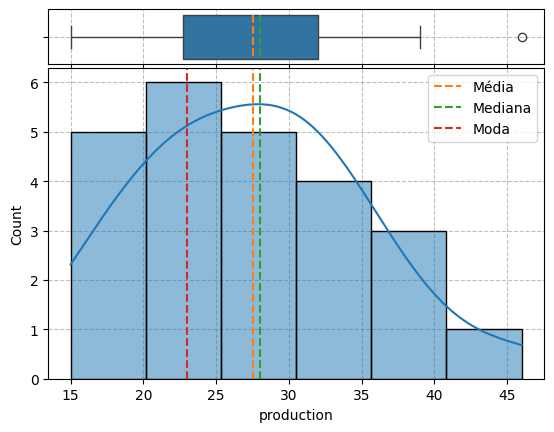

In [14]:
hist_box(df, 'production')

In [15]:
from scipy.stats import shapiro

shapiro(df['production'])

ShapiroResult(statistic=0.9780083233733671, pvalue=0.8565108931130727)

In [16]:
from meus_modulos.auxiliares import analise_shapiro

analise_shapiro(df, alfa=0.01)

Teste de Shapiro-Wilk
estatistica_sw=0.978
production segue uma distribuição normal (valor p: valor_p_sw=0.857)


In [17]:
import pandas as pd

DATA = 'C:\\Users\\steph\\OneDrive\\Documentos\\MeusProjetos\\Ciencia-de-dados\\dados_hash\\customers_stores.csv'

df = pd.read_csv(DATA, index_col='Dia')

df.head()

,Loja_1,Loja_2,Loja_3
Dia,,,
Dia 1,620,710,924
Dia 2,630,780,695
Dia 3,610,810,854
Dia 4,650,755,802
Dia 5,585,699,931


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, Dia 1 to Dia 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Loja_1  14 non-null     int64
 1   Loja_2  14 non-null     int64
 2   Loja_3  14 non-null     int64
dtypes: int64(3)
memory usage: 448.0+ bytes


In [19]:
df.describe()

,Loja_1,Loja_2,Loja_3
count,14.000000,14.000000,14.000000
mean,609.428571,737.214286,833.357143
std,24.405908,62.246629,78.914371
min,570.000000,645.000000,695.000000
25%,591.250000,699.750000,776.750000
50%,607.500000,714.000000,850.500000
75%,628.000000,773.750000,897.750000
max,650.000000,850.000000,931.000000


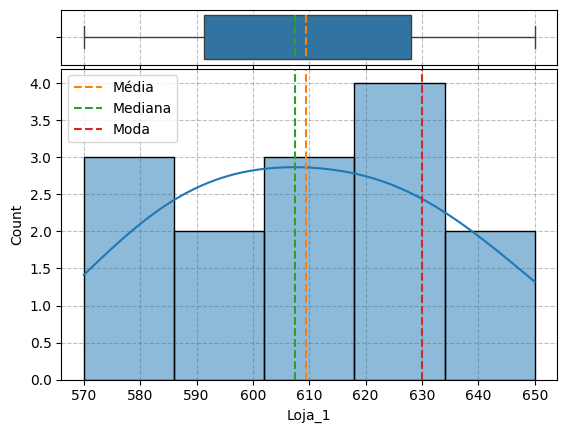

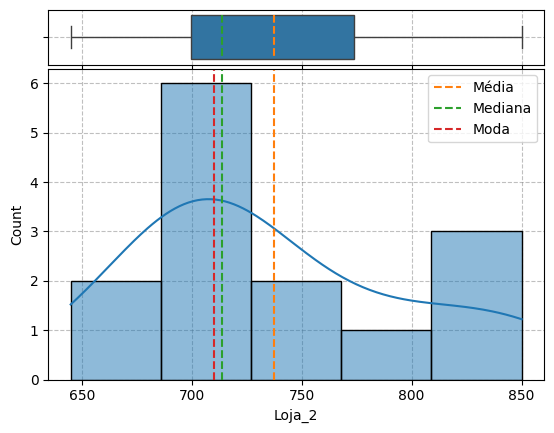

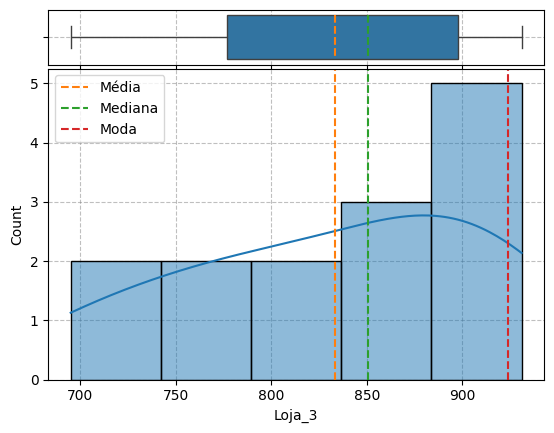

In [20]:
for coluna in df.columns:
    hist_box(df, coluna)

<Axes: ylabel='Count'>

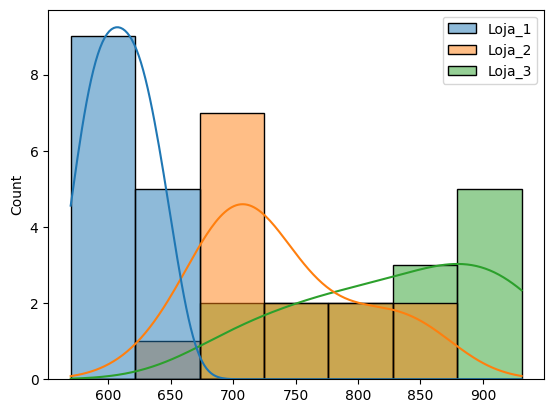

In [21]:
import seaborn as sns

sns.histplot(df, kde = True)

<Axes: >

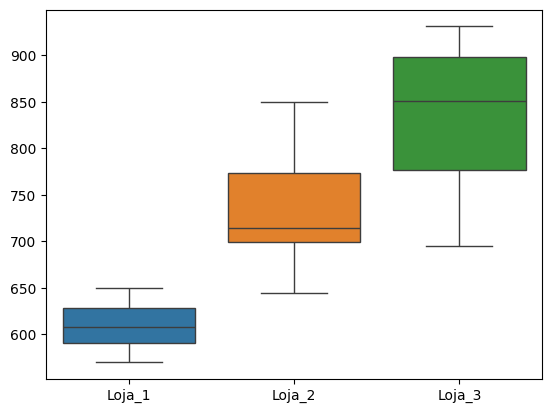

In [22]:
sns.boxplot(data = df)

In [23]:
analise_shapiro(df)

Teste de Shapiro-Wilk
estatistica_sw=0.975
Loja_1 segue uma distribuição normal (valor p: valor_p_sw=0.935)
estatistica_sw=0.917
Loja_2 segue uma distribuição normal (valor p: valor_p_sw=0.197)
estatistica_sw=0.932
Loja_3 segue uma distribuição normal (valor p: valor_p_sw=0.322)


In [24]:
from scipy.stats import levene

levene(df['Loja_1'], df['Loja_2'], df['Loja_3'], center='mean')

LeveneResult(statistic=8.426665687474399, pvalue=0.0009084535848988543)

In [25]:
from meus_modulos.auxiliares import analise_levene

analise_levene(df)

Teste de Levene
estatistica_levene=8.427
Ao menos uma variância diferente (valor p: valor_p_lv=0.001)


In [26]:
from meus_modulos.auxiliares import analises_shapiro_levene

analises_shapiro_levene(df)

Teste de Shapiro-Wilk
estatistica_sw=0.975
Loja_1 segue uma distribuição normal (valor p: valor_p_sw=0.935)
estatistica_sw=0.917
Loja_2 segue uma distribuição normal (valor p: valor_p_sw=0.197)
estatistica_sw=0.932
Loja_3 segue uma distribuição normal (valor p: valor_p_sw=0.322)

Teste de Levene
estatistica_levene=8.427
Ao menos uma variância diferente (valor p: valor_p_lv=0.001)
